<a href="https://colab.research.google.com/github/Prisci723/ia2/blob/main/Laboratorios/Laboratorio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerias

import torch
import torchvision
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import random
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

PATH = '/content/drive/MyDrive/SIS421 prueba dataset 1'

classes = os.listdir(PATH)
classes

['Floripondio', 'Aloe Vera', 'Nispero', 'Cedron', 'Higuera']

In [25]:
imgs, labels = [], []

for i, lab in enumerate(classes):
  paths = os.listdir(f'{PATH}/{lab}')
  print(f'Categoría: {lab}. Imágenes: {len(paths)}')
  paths = [p for p in paths if p[-3:] == "jpg"]
  imgs += [f'{PATH}/{lab}/{img}' for img in paths]
  labels += [i]*len(paths)

Categoría: Aloe Vera. Imágenes: 2289
Categoría: Cedron. Imágenes: 2212
Categoría: Floripondio. Imágenes: 2214
Categoría: Higuera. Imágenes: 2220
Categoría: Nispero. Imágenes: 2223


In [26]:

train_imgs, test_imgs, train_labels, test_labels = train_test_split(imgs, labels, test_size=0.2, stratify=labels)

len(train_imgs), len(test_imgs)

(8926, 2232)

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    #print(f"imagen: {img}")
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [28]:
import albumentations as A
from skimage import io

trans = A.Compose([
    A.Resize(50, 50)
])

dataset = {
    'train': Dataset(train_imgs, train_labels, trans, device),
    'test': Dataset(test_imgs, test_labels, trans, device)
}

len(dataset['train']), len(dataset['test'])

(8926, 2232)

In [29]:
dataset['train'][2]

(tensor([[[0.5961, 0.6039, 0.6039,  ..., 0.2627, 0.2588, 0.2275],
          [0.5961, 0.6078, 0.6039,  ..., 0.4510, 0.2549, 0.2000],
          [0.5961, 0.6039, 0.5961,  ..., 0.3725, 0.2471, 0.2510],
          ...,
          [0.5765, 0.5843, 0.5725,  ..., 0.6157, 0.5608, 0.5333],
          [0.5882, 0.5725, 0.5961,  ..., 0.6392, 0.6431, 0.6392],
          [0.5961, 0.6000, 0.6000,  ..., 0.6588, 0.6392, 0.6314]],
 
         [[0.5333, 0.5333, 0.5412,  ..., 0.3020, 0.3059, 0.2549],
          [0.5333, 0.5333, 0.5294,  ..., 0.4941, 0.2667, 0.2196],
          [0.5333, 0.5294, 0.5216,  ..., 0.3804, 0.2314, 0.2863],
          ...,
          [0.5020, 0.5098, 0.5098,  ..., 0.5843, 0.5490, 0.5216],
          [0.5137, 0.4980, 0.5216,  ..., 0.5804, 0.5843, 0.5765],
          [0.5216, 0.5255, 0.5294,  ..., 0.5961, 0.5765, 0.5725]],
 
         [[0.4039, 0.4039, 0.4118,  ..., 0.3059, 0.3686, 0.2824],
          [0.4000, 0.4039, 0.4000,  ..., 0.5922, 0.2902, 0.2392],
          [0.4039, 0.4039, 0.3922,  ...,

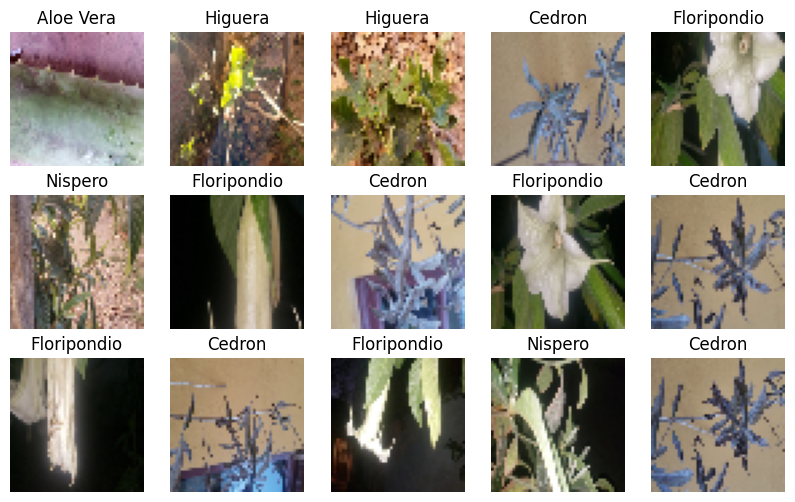

In [30]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [31]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True),
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape

torch.Size([64, 3, 50, 50])

In [32]:
import torchvision

resnet = torchvision.models.resnet18()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
class ModelCustom(torch.nn.Module):
  def __init__(self, n_outputs=5, pretrained=False, freeze=False):
    super().__init__()
    # descargamos resnet
    resnet = torchvision.models.resnet18(pretrained=pretrained)
    # nos quedamos con todas las capas menos la última
    self.resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
    if freeze:
      for param in self.resnet.parameters():
        param.requires_grad=False
    # añadimos una nueva capa lineal para llevar a cabo la clasificación
    self.fc = torch.nn.Linear(512, 5)

  def forward(self, x):
    x = self.resnet(x)
    x = x.view(x.shape[0], -1)
    x = self.fc(x)
    return x

  def unfreeze(self):
    for param in self.resnet.parameters():
        param.requires_grad=True

In [34]:
model_custom = ModelCustom()
outputs = model_custom(torch.randn(64, 3, 224, 224))
outputs.shape

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([64, 5])

In [35]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5, lr=1e-2):
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [36]:
model_c = ModelCustom(pretrained=True, freeze=False)
fit(model_c, dataloader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]
val_loss 0.01380 val_acc 0.99957: 100%|██████████| 9/9 [00:51<00:00,  5.76s/it]


Epoch 1/5 loss 0.20159 val_loss 0.01380 acc 0.95188 val_acc 0.99957


val_loss 0.00487 val_acc 1.00000: 100%|██████████| 9/9 [00:50<00:00,  5.61s/it]


Epoch 2/5 loss 0.01480 val_loss 0.00487 acc 0.99888 val_acc 1.00000


val_loss 0.00355 val_acc 1.00000: 100%|██████████| 9/9 [00:52<00:00,  5.82s/it]


Epoch 3/5 loss 0.00701 val_loss 0.00355 acc 0.99978 val_acc 1.00000


val_loss 0.00193 val_acc 1.00000: 100%|██████████| 9/9 [00:49<00:00,  5.53s/it]


Epoch 4/5 loss 0.00469 val_loss 0.00193 acc 0.99978 val_acc 1.00000


val_loss 0.00137 val_acc 1.00000: 100%|██████████| 9/9 [00:49<00:00,  5.49s/it]

Epoch 5/5 loss 0.00328 val_loss 0.00137 acc 1.00000 val_acc 1.00000


In [38]:
optimizer = torch.optim.Adam([
    {'params': model_c.resnet.parameters(), 'lr': 1e-4},
    {'params': model_c.fc.parameters(), 'lr': 1e-3}
])

In [39]:
from tqdm import tqdm

def fit(model, dataloader, epochs=5, lr_resnet=1e-4, lr_fc=1e-3):
    model.to(device)
    optimizer = optimizer = torch.optim.Adam([{'params': model.resnet.parameters(), 'lr': lr_resnet},{'params': model.fc.parameters(), 'lr': lr_fc}])
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

In [40]:
model_o = ModelCustom(pretrained=True, freeze=True)
fit(model_o, dataloader, lr_resnet=1e-4, lr_fc=1e-3)
model_o.unfreeze()
fit(model_o, dataloader, lr_resnet=1e-4, lr_fc=1e-3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
val_loss 0.23238 val_acc 0.94639: 100%|██████████| 9/9 [00:55<00:00,  6.15s/it]


Epoch 1/5 loss 0.51425 val_loss 0.23238 acc 0.84885 val_acc 0.94639


val_loss 0.14503 val_acc 0.97381: 100%|██████████| 9/9 [00:48<00:00,  5.37s/it]


Epoch 2/5 loss 0.19967 val_loss 0.14503 acc 0.95054 val_acc 0.97381


val_loss 0.11310 val_acc 0.97641: 100%|██████████| 9/9 [00:50<00:00,  5.64s/it]


Epoch 3/5 loss 0.16275 val_loss 0.11310 acc 0.95443 val_acc 0.97641


val_loss 0.09589 val_acc 0.97849: 100%|██████████| 9/9 [00:49<00:00,  5.51s/it]


Epoch 4/5 loss 0.12366 val_loss 0.09589 acc 0.96786 val_acc 0.97849


val_loss 0.08319 val_acc 0.98162: 100%|██████████| 9/9 [00:49<00:00,  5.48s/it]


Epoch 5/5 loss 0.10336 val_loss 0.08319 acc 0.97253 val_acc 0.98162


val_loss 0.00579 val_acc 0.99870: 100%|██████████| 9/9 [00:49<00:00,  5.46s/it]


Epoch 1/5 loss 0.02232 val_loss 0.00579 acc 0.99397 val_acc 0.99870


val_loss 0.02465 val_acc 0.99696: 100%|██████████| 9/9 [00:48<00:00,  5.40s/it]


Epoch 2/5 loss 0.00548 val_loss 0.02465 acc 0.99833 val_acc 0.99696


val_loss 0.00022 val_acc 1.00000: 100%|██████████| 9/9 [00:58<00:00,  6.49s/it]


Epoch 3/5 loss 0.00511 val_loss 0.00022 acc 0.99844 val_acc 1.00000


val_loss 0.00018 val_acc 1.00000: 100%|██████████| 9/9 [00:50<00:00,  5.56s/it]


Epoch 4/5 loss 0.00442 val_loss 0.00018 acc 0.99866 val_acc 1.00000


val_loss 0.00015 val_acc 1.00000: 100%|██████████| 9/9 [00:50<00:00,  5.66s/it]

Epoch 5/5 loss 0.00199 val_loss 0.00015 acc 0.99944 val_acc 1.00000
